In [1]:
# useful libraries, including pyWaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle
import scanpy as sc
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd
from matplotlib import rcParams

In [2]:
data_dir = os.path.join(os.getcwd(), '.data')
adata_path = os.path.join(data_dir, 'Marburg_cell_states_locked_ctl240709.raw.h5ad')
adata = sc.read_h5ad(adata_path)
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'viral_counts', 'infected_status', 'seed_labels', 'batch-scANVI'
    var: 'mt', 'ribo'
    uns: 'cell_compartment_colors', 'cell_states_colors', 'disease_colors', 'group_colors', 'infection_colors'
    obsm: 'X_scANVI', 'X_umap'

In [3]:
healthy_ctrl = adata.obs[adata.obs['group'] == 'healthy_ctrl']['cell_compartment'].value_counts()
healthy_iav = adata.obs[adata.obs['group'] == 'healthy_iav']['cell_compartment'].value_counts()
copd_ctrl = adata.obs[adata.obs['group'] == 'copd_ctrl']['cell_compartment'].value_counts()
copd_iav = adata.obs[adata.obs['group'] == 'copd_iav']['cell_compartment'].value_counts()
df = pd.concat((
    pd.DataFrame(healthy_ctrl),
    pd.DataFrame(healthy_iav),
    pd.DataFrame(copd_ctrl),
    pd.DataFrame(copd_iav),
), axis=1)
df

,count,count,count,count
cell_compartment,,,,
Basal,7480,11325,10496,10434
Goblet,6755,2996,8073,4263
SupraB,2792,2977,2939,2291
Ciliated,1618,911,625,541
Mixed,1529,442,2936,1351
Secretory,1071,699,1006,431
Club,967,3151,846,4091
Deuterosomal,243,80,92,59
Ionocyte,126,180,150,155


In [4]:
healthy_iav

cell_compartment
Basal           11325
Club             3151
Goblet           2996
SupraB           2977
Ciliated          911
Secretory         699
Epi               569
Mixed             442
Ionocyte          180
Deuterosomal       80
Name: count, dtype: int64

In [5]:
def get_compartment_counts_for_condition_dict(adata, obs_column):

    def get_compartment_counts_for_condition(adata, obs_column, obs_column_value):
        df = adata.obs
        df = df[df[obs_column] == obs_column_value]
        return df['cell_compartment'].value_counts()

    def value_counts_to_dict(value_counts):
        counts_dict = {}
        for k, v in value_counts.items():
            counts_dict[k] = v
        return counts_dict
    
    conditions = list(adata.obs[obs_column].unique())
    counts_dict_list = []
    for condition in conditions:
        value_counts = get_compartment_counts_for_condition(adata, obs_column, condition)
        value_counts_dict = value_counts_to_dict(value_counts)
        counts_dict_list.append(value_counts_dict)
    return counts_dict_list



In [6]:
pd.DataFrame(healthy_ctrl)

,count
cell_compartment,
Basal,7480
Goblet,6755
SupraB,2792
Ciliated,1618
Mixed,1529
Secretory,1071
Club,967
Deuterosomal,243
Ionocyte,126


In [7]:
list_counts = get_compartment_counts_for_condition_dict(adata, 'group')

In [8]:
healthy_ctrl_dict = {}
for k, v in healthy_ctrl.items():
    healthy_ctrl_dict[k] = v

In [9]:
healthy_ctrl_dict

{'Basal': 7480,
 'Goblet': 6755,
 'SupraB': 2792,
 'Ciliated': 1618,
 'Mixed': 1529,
 'Secretory': 1071,
 'Club': 967,
 'Deuterosomal': 243,
 'Ionocyte': 126,
 'Epi': 7}

In [10]:
list[0]

list[0]

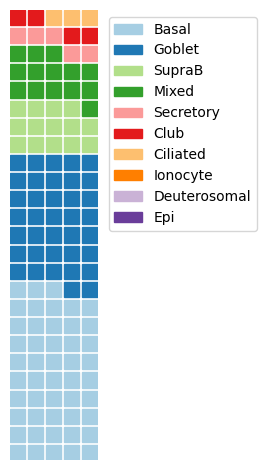

In [11]:
palette = sns.mpl_palette('Paired', 12)
custom_cmap = ListedColormap(palette)
plt.figure(
  FigureClass=Waffle,
  rows=25,
  columns=5,
  values=list_counts[0],
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
  vertical=True,
  cmap_name = custom_cmap
)
plt.show()

In [12]:
df.columns = ['healthy_ctrl', 'healthy_iav', 'copd_ctrl', 'copd_iav']
df

,healthy_ctrl,healthy_iav,copd_ctrl,copd_iav
cell_compartment,,,,
Basal,7480,11325,10496,10434
Goblet,6755,2996,8073,4263
SupraB,2792,2977,2939,2291
Ciliated,1618,911,625,541
Mixed,1529,442,2936,1351
Secretory,1071,699,1006,431
Club,967,3151,846,4091
Deuterosomal,243,80,92,59
Ionocyte,126,180,150,155


In [13]:
list(df.index)

['Basal',
 'Goblet',
 'SupraB',
 'Ciliated',
 'Mixed',
 'Secretory',
 'Club',
 'Deuterosomal',
 'Ionocyte',
 'Epi']

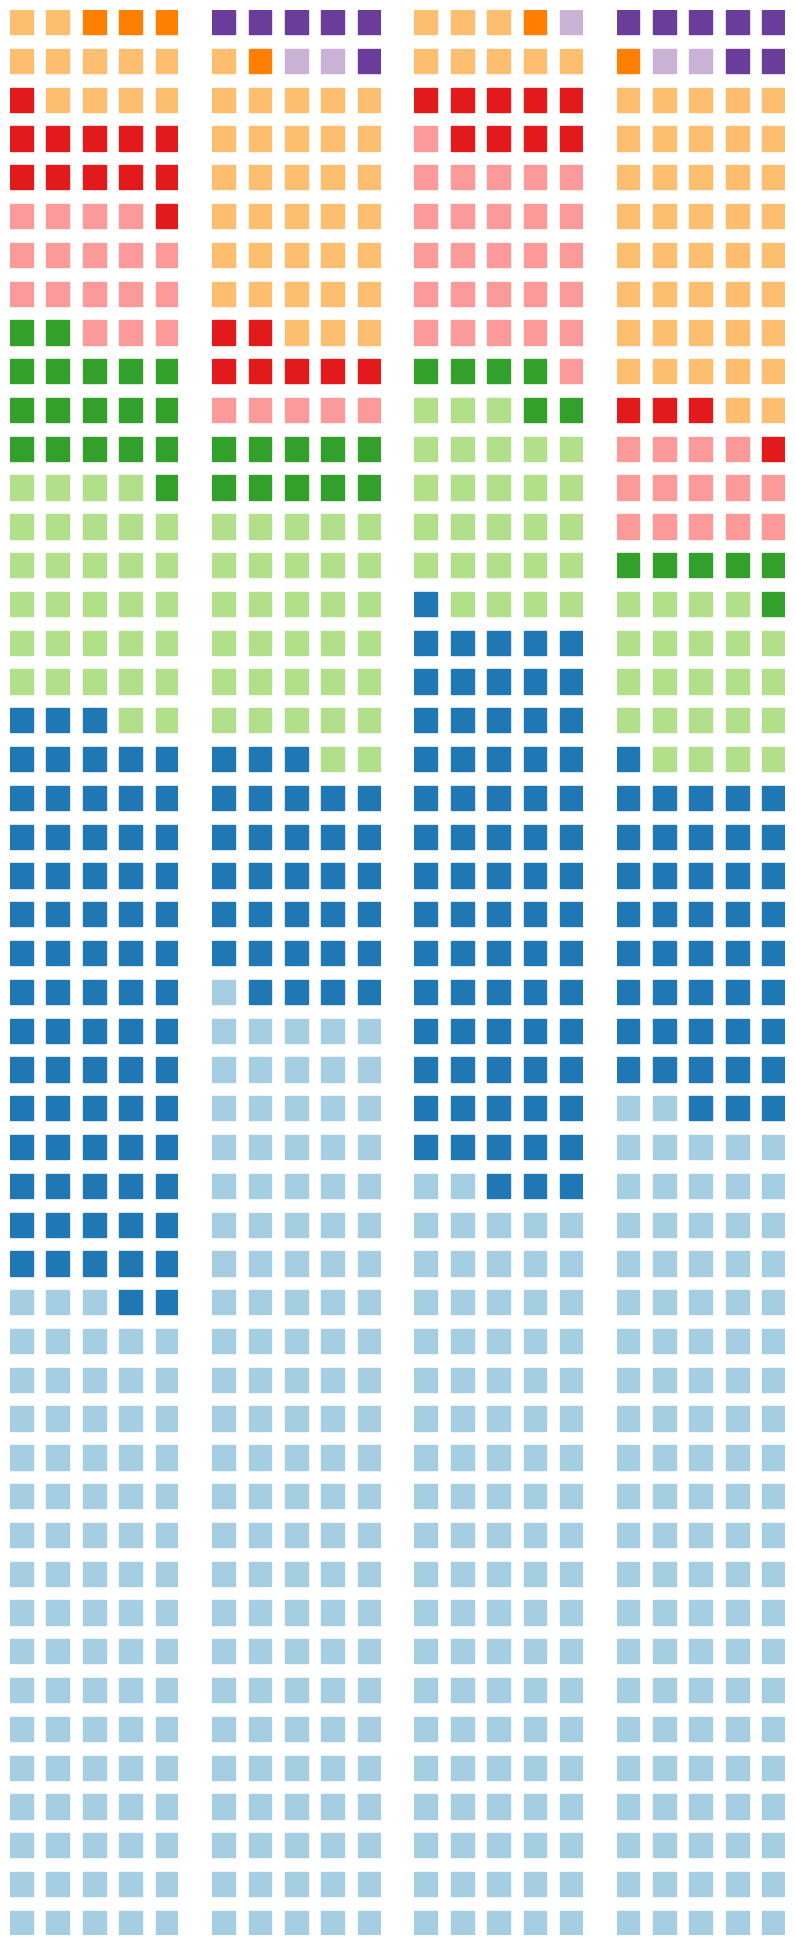

In [50]:
palette = sns.color_palette('Paired', 12)
custom_cmap = ListedColormap(palette)
number_of_bars = len(df.columns) # one bar per year

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(10,25)
                        )

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name] # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=50,
        columns=5,
        values=values,
        vertical=True,
        block_arranging_style='new-line',
        block_aspect_ratio=1,
        cmap_name = custom_cmap,
        interval_ratio_y=0.6,
        interval_ratio_x=0.6,
        #title={'label': col_name, 'loc': 'center'},
        #legend={'loc': 'lower center', 'bbox_to_anchor': (1.05, 1), 'labels': ['Basal',
        #                                                                     'Goblet',
        #                                                                     'SupraB',
        #                                                                     'Ciliated',
        #                                                                     'Mixed',
        #                                                                     'Secretory',
        #                                                                     'Club',
        #                                                                     'Deuterosomal',
        #                                                                     'Ionocyte',
        #                                                                     'Epi']},
    )


#plt.show()
plt.savefig('plots_output/waffleplot.svg', format='svg', dpi=300)

In [182]:
print(palette.as_hex())

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


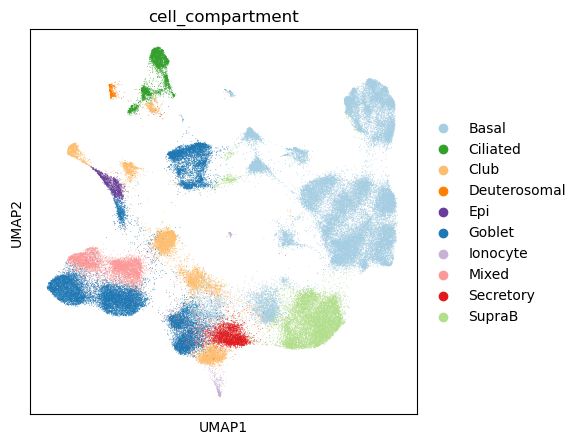

In [218]:
figure_name = 'compartment_umap.png'
output_folder = '/mnt/LaCIE/ceger/Projects/COPD/COPD_influenza/4-analysis_by_cell_type/comp_analysis_eger/plots_output'
figure_path = os.path.join(output_folder, figure_name)
rcParams['figure.figsize'] = (5,5)
sc.pl.umap(
    adata, 
    color='cell_compartment',
    #frameon=False,
    save=figure_name,
    palette={
        'Basal': '#a6cee3',
        'Goblet': '#1f78b4',
        'SupraB': '#b2df8a',
        'Ciliated': '#33a02c',
        'Mixed': '#fb9a99',
        'Secretory': '#e31a1c',
        'Club': '#fdbf6f',
        'Deuterosomal': '#ff7f00',
        'Ionocyte': '#cab2d6',
        'Epi': '#6a3d9a',
    })

In [221]:
disease_palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)]

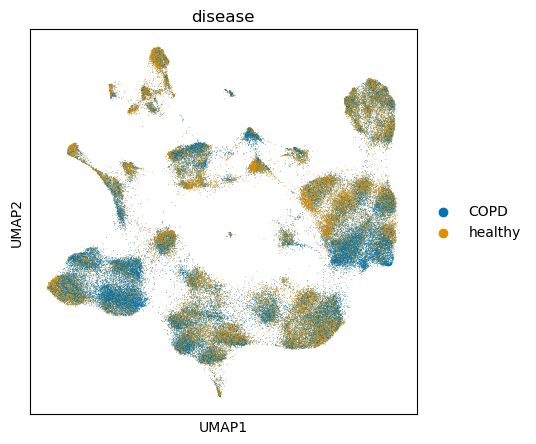

In [51]:
figure_name = 'disease_umap.pdf'
output_folder = '/mnt/LaCIE/ceger/Projects/COPD/COPD_influenza/4-analysis_by_cell_type/comp_analysis_eger/plots_output'
figure_path = os.path.join(output_folder, figure_name)
rcParams['figure.figsize'] = (5,5)
disease_palette = sns.color_palette('colorblind', 2)
sc.pl.umap(
    adata, 
    color='disease',
    #frameon=False,
    save=figure_name,
    palette=disease_palette,
)

In [ ]:
'#029e73', '#d55e00'

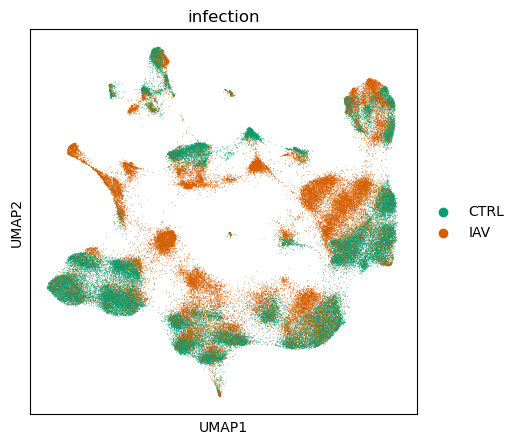

In [52]:
figure_name = 'infection_umap.pdf'
output_folder = '/mnt/LaCIE/ceger/Projects/COPD/COPD_influenza/4-analysis_by_cell_type/comp_analysis_eger/plots_output'
figure_path = os.path.join(output_folder, figure_name)
rcParams['figure.figsize'] = (5,5)
sc.pl.umap(
    adata, 
    color='infection',
    #frameon=False,
    save=figure_name,
    palette={
        'CTRL': '#029e73', 
        'IAV': '#d55e00'
    })